In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, extract_data_from_df, visualize, statistical_tests

# Read Data

In [4]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [5]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [6]:
", ".join(df.columns.tolist())


'medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, literary_texts, source, content_type_ppn, DDC_sachgruppe_a, DDC_sachgruppe_b, DDC_sachgruppe_c, keyword_fremd_ppn, keyword_fremd, keyword_einzel_ppn, keyword_einzel, keyword_BDSL_a, keyword_BDS

In [7]:
df.shape

(1041157, 77)

In [8]:
df["year_extracted"] = df["year"].str.findall(r"\d\d\d\d").str[0].astype(int)

In [9]:
df["year_extracted"]

ppn
1642067407    1987
1678415065    2019
1678415065    2019
1678415065    2019
1678415065    2019
              ... 
448323834     1987
448323834     1987
44832184X     1982
44832184X     1982
44832184X     1982
Name: year_extracted, Length: 1041157, dtype: int32

# Price

## Extract Price

In [10]:
df.notna().astype(int).groupby(df['source']).mean()["comment_isbn"]

source
hebis      0.165785
k10plus    0.294896
Name: comment_isbn, dtype: float64

In [11]:
round(df["comment_isbn"].notna().sum() / df.shape[0], 2)*100

27.0

In [12]:
df["comment_isbn"].value_counts(dropna=False)

NaN                                                759636
alk. paper                                           2630
kart.                                                2612
 (kart.)                                             1735
 : 20.00 EUR                                         1670
                                                    ...  
sfr 27.80                                               1
pbk. : EUR 76.00                                        1
1re publication poche|2nde publication poche            1
 : Pb. : EUR 29.95 (DE)| : Pb. : EUR 29.95 (DE)         1
kart. : EUR 3,10                                        1
Name: comment_isbn, Length: 27451, dtype: int64

In [13]:
df.loc[df["comment_isbn"].notna()]["comment_isbn"].sample(20)

ppn
319884570                                            alk. paper
181650819                            : DM 68.00 (engl. brosch.)
22987813X                                                  geh.
735981957                                           : 40.00 EUR
114273294                                              : $44.00
266707939                                               (kart.)
1645367517                                  Broschur : EUR 3.60
122609441                                              : 90.00F
363662847                                                : 10 €
895274647                                             : 32,90 €
645076430                                  Pb. : EUR 39.90 (AT)
568687329                                   (hdc.) : 109,00 EUR
332349780                   Pb. : DM 49.00, sfr 49.00, S 349.00
080585175                                       kart. : DM 6.80
775621862     Gb. : EUR 57.95 (DE), EUR 59.60 (AT), sfr 66.0...
898871085      : EUR 39.95 (DE), EUR

In [15]:
((df.loc[df["comment_isbn"].notna()]["year"].value_counts() / df["year"].value_counts())*100).round(2)

1980              3.91
1981              3.95
1982              3.51
1983              3.44
1984              3.54
1985              3.74
1986              3.84
1987              4.88
1988              5.61
1989              5.95
1990              5.68
1991              8.49
1992             15.38
1993             17.60
1994             18.09
1995             16.80
1996             18.74
1997             19.48
1998             24.99
1999             26.58
2000             26.65
2001             27.68
2002             30.19
2003             24.85
2004             26.55
2005             27.01
2006             38.04
2007             42.12
2008             44.30
2009             46.46
2010             50.04
2011             45.53
2012             46.23
2012]              NaN
2013             51.82
2014             52.08
2015             51.51
2016             56.13
2017             57.03
2018             58.30
2018$a[2018]    100.00
2019             57.24
Name: year, dtype: float64

In [16]:
df = extract_data_from_df.extract_currencies(df, "comment_isbn")

no_currency
	- Converted into float successfully!
EUR
	- Converted into float successfully!
DM
	- Converted into float successfully!
M
	- Converted into float successfully!
CHF
	- Converted into float successfully!
円
	- Convertion into float failed.
USD
	- Converted into float successfully!
sfr
	- Converted into float successfully!
S
	- Converted into float successfully!
£
	- Converted into float successfully!
€
	- Converted into float successfully!
\$
	- Converted into float successfully!
EUR_D
	- Converted into float successfully!
EUR_AT
	- Convertion into float failed.


In [17]:
for column in df.columns.tolist()[-14:]:
    print(column, round((df[column].notna().sum() / df.shape[0] * 100), 2))


no_currency 0.01
EUR 13.69
DM 4.46
M 4.55
CHF 0.61
円 0.0
USD 0.08
sfr 5.34
S 1.55
£ 0.72
€ 0.69
\$ 0.1
EUR_D 0.0
EUR_AT 0.0


In [18]:
for column in df.columns.tolist()[-14:]:
    print(column, (df.loc[df["source"]=="k10plus"][column].notna().mean().round(3))*100)


no_currency 0.0
EUR 14.7
DM 4.8
M 4.9
CHF 0.7000000000000001
円 0.0
USD 0.0
sfr 5.3
S 1.6
£ 0.8
€ 0.8
\$ 0.1
EUR_D 0.0
EUR_AT 0.0


In [19]:
for column in df.columns.tolist()[-14:]:
    print(column, (df.loc[df["source"]=="hebis"][column].notna().mean().round(3)) * 100)


no_currency 0.0
EUR 9.2
DM 3.2
M 3.2
CHF 0.3
円 0.0
USD 0.3
sfr 5.3
S 1.3
£ 0.2
€ 0.0
\$ 0.1
EUR_D 0.0
EUR_AT 0.0


In [20]:
df["EUR_agg"] = df[["EUR","EUR_D", "EUR_AT", "€"]].median(axis=1)


In [21]:
df["sfr_agg"] = df[["sfr","CHF"]].median(axis=1)


In [22]:
df["DM_agg"] = df[["DM","M"]].median(axis=1)


In [23]:
df["S_agg"] = df[["\$","S", "USD"]].median(axis=1)


In [24]:
df["£_agg"] = df[["£"]].median(axis=1)


In [25]:
# Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
s_average_rate = 0.85
L_average_rate = 1.32
sfr_average_rate = 0.76
dm_rate = 0.51


In [26]:
df["sfr_agg_EUR"] = df["sfr_agg"] * sfr_average_rate
df["S_agg_EUR"] = df["S_agg"] * s_average_rate
df["£_agg_EUR"] = df["£_agg"] * L_average_rate
df["DM_agg_EUR"] = df["DM_agg"] * dm_rate


In [27]:
df["S_agg_EUR"].dropna()

ppn
022138587    43.18
022138587    43.18
022138587    43.18
022138587    43.18
022138587    43.18
             ...  
111181976    17.00
111181976    17.00
106773674    33.15
106773674    33.15
384859844    23.80
Name: S_agg_EUR, Length: 17972, dtype: float64

In [28]:
df["EUR_agg_agg"] = df[["EUR_agg", "sfr_agg_EUR","S_agg_EUR", "£_agg_EUR", "DM_agg_EUR"]].median(axis=1)

In [29]:
df["EUR_agg_agg"].dropna()

ppn
560158602     19.0
632674113     23.0
1620970872    20.0
644175265     35.0
644175265     35.0
              ... 
120955857     20.0
120955857     20.0
120955857     20.0
120955857     20.0
116171006     46.0
Name: EUR_agg_agg, Length: 206765, dtype: float64

In [30]:
round((df["EUR_agg_agg"].notna().sum() / df.shape[0] * 100), 2)

19.86

In [31]:
df["EUR_agg_agg"].dropna().shape

(206765,)

In [32]:
df["medium_first"] = df["medium"].str[0]

# Visualize

<AxesSubplot:>

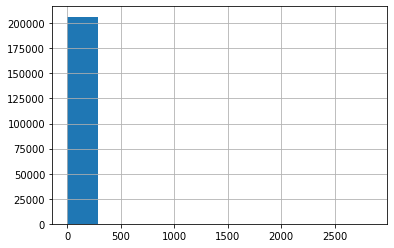

In [33]:
df["EUR_agg_agg"].hist()

<AxesSubplot:>

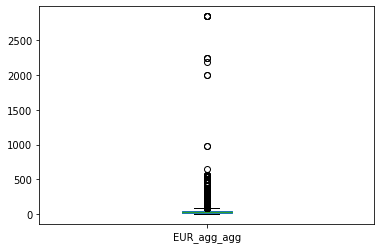

In [34]:
df["EUR_agg_agg"].plot.box()

In [35]:
df.loc[(df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].median()

28.0

In [36]:
df.loc[(df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].mean()

35.459303574668745

In [37]:
df.loc[(df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].std()

29.312269916038908

In [38]:
df["price in euros"] = df["EUR_agg_agg"]

In [39]:
year_prices_df = df.groupby("year_publication")

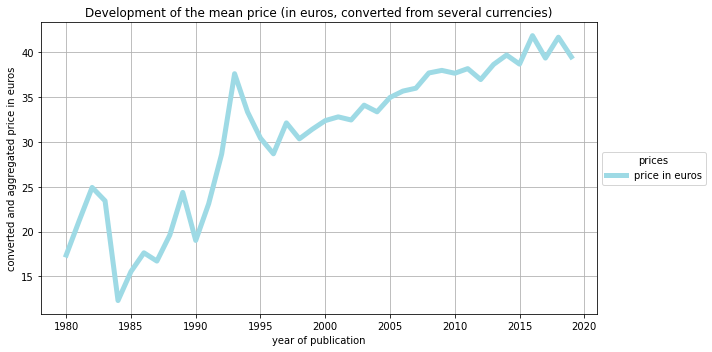

In [40]:
visualize.plot_lines(year_prices_df["price in euros"].mean(), xlabel = "year of publication", ylabel ="converted and aggregated price in euros",
title = "Development of the mean price (in euros, converted from several currencies)", title_legend="prices", figure_name = "line_development_prices_mean"
)

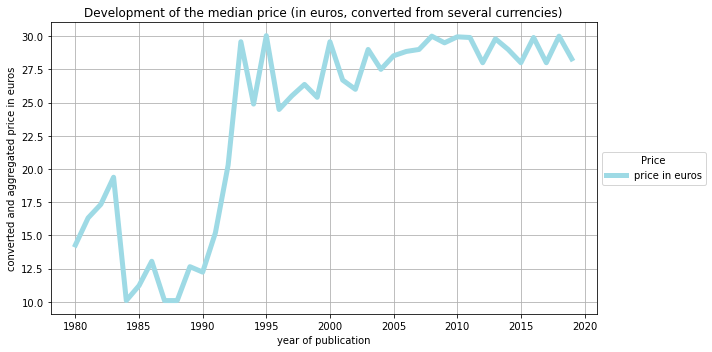

In [41]:
visualize.plot_lines(year_prices_df["price in euros"].median(), xlabel = "year of publication", ylabel ="converted and aggregated price in euros",
title = "Development of the median price (in euros, converted from several currencies)", title_legend="Price", figure_name = "figure_16_line_development_prices_median",
)

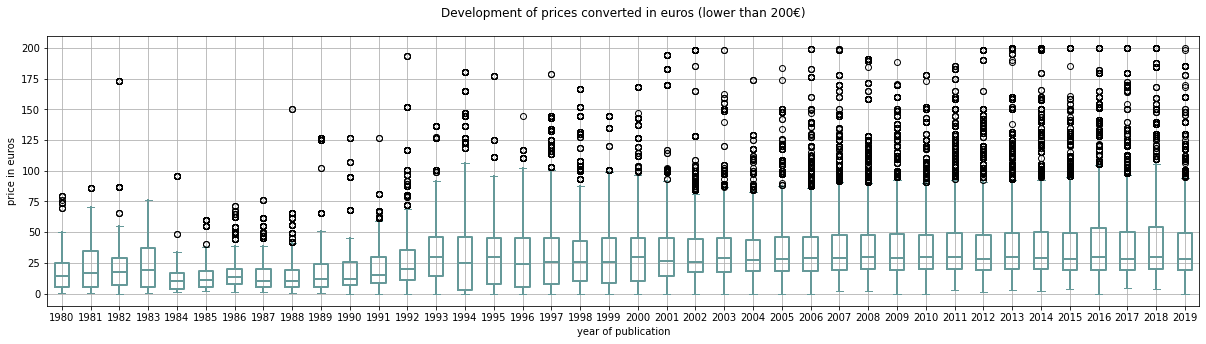

In [42]:
visualize.plot_boxplots_by(df.loc[(df["EUR_agg_agg"]< 200 )], "EUR_agg_agg", "year_publication",
xlabel = "year of publication", ylabel = "price in euros", title ="Development of prices converted in euros (lower than 200€)", figure_name = "boxplots_price_development")

#df.loc[df["medium_first"].isin(["A"]) & (df["EUR_agg_agg"]< 500 )].boxplot("EUR_agg_agg", by="year_publication", figsize=(20,5))


In [43]:
year_prices_df[["EUR_agg_agg"]].median().head(5)

EUR_agg_agg
year_publication             
1980                   14.280
1981                   16.320
1982                   17.340
1983                   19.380
1984                   10.098

In [44]:
year_prices_median_df = year_prices_df[["EUR_agg_agg"]].median()


In [45]:
year_prices_median_df["year_publication"] = year_prices_median_df.index

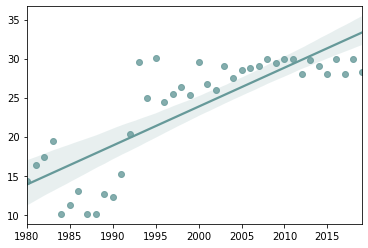

In [46]:
visualize.plot_scatter_w_regression_line(year_prices_median_df, "year_publication", "EUR_agg_agg")

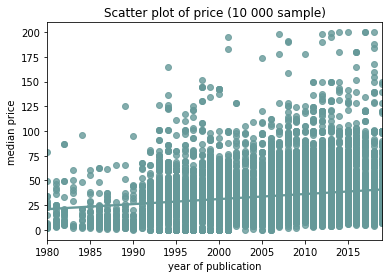

In [47]:
visualize.plot_scatter_w_regression_line(df.loc[(df["EUR_agg_agg"]< 200 )].sample(10000), "year_publication", "EUR_agg_agg",
xlabel = "year of publication", ylabel = "median price", figure_name = "scatter_price", title = "Scatter plot of price (10 000 sample)")

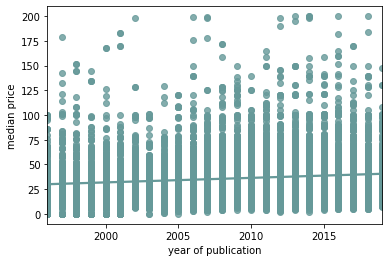

In [48]:
visualize.plot_scatter_w_regression_line(df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )].sample(10000), "year_publication", "EUR_agg_agg",
xlabel = "year of publication", ylabel = "median price")

In [49]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )]["year_publication"], df.loc[(df["EUR_agg_agg"]< 200 ) & (df["year_publication"] > 1995 )]["EUR_agg_agg"] )

In [50]:
print(pvalue, slope)

0.0 0.4849907777247703


In [51]:
results_regression_euros_df = statistical_tests.calculate_regression_line(year_prices_median_df.loc[year_prices_median_df["year_publication"] > 1995][["EUR_agg_agg"]])

In [52]:
results_regression_euros_df["expectation_2020"] = (results_regression_euros_df["slope"] * 2020) + results_regression_euros_df["intercept"]

In [53]:
results_regression_euros_df["expectation_2030"] = (results_regression_euros_df["slope"] * 2030) + results_regression_euros_df["intercept"]

In [54]:
results_regression_euros_df["expectation_2040"] = (results_regression_euros_df["slope"] * 2040) + results_regression_euros_df["intercept"]

In [55]:
results_regression_euros_df

column     slope   intercept    rvalue    pvalue    stderr  \
column                                                                         
EUR_agg_agg  EUR_agg_agg  0.154604 -282.150228  0.655469  0.000507  0.037978   

             expectation_2020  expectation_2030  expectation_2040  
column                                                             
EUR_agg_agg         30.150554         31.696598         33.242641

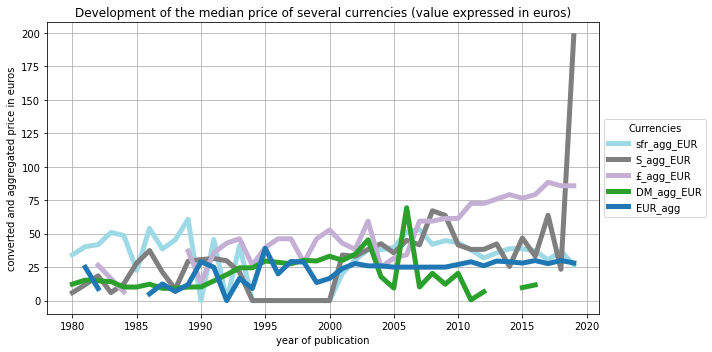

In [56]:
visualize.plot_lines(year_prices_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median(),
xlabel = "year of publication", ylabel ="converted and aggregated price in euros",
title = "Development of the median price of several currencies (value expressed in euros)", title_legend="Currencies", figure_name = "line_development_prices_median"
)

In [57]:
year_prices_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median()


sfr_agg_EUR  S_agg_EUR  £_agg_EUR  DM_agg_EUR  EUR_agg
year_publication                                                        
1980                  34.2000    5.90750    79.2000      12.240      NaN
1981                  40.2800   11.90000        NaN      15.300    24.90
1982                  41.8000   18.48750    26.4000      14.790     9.00
1983                  50.9200    5.95000    16.5000      14.178      NaN
1984                  48.6400   12.53750     6.5340      10.098     5.80
1985                  22.8000   28.05000        NaN      10.098      NaN
1986                  53.9600   37.40000    22.4268      12.240     5.00
1987                  38.6080   21.25000        NaN       9.180    12.40
1988                  45.3720    8.45750        NaN       9.180     6.80
1989                  60.8000   29.45250    36.9600      10.098    12.00
1990                   0.0000   30.60000    13.5300      10.200    29.00
1991                  45.6000   31.45000    35.6400      14.688    24.90
1992                   0.0000   29.75000    42.9000      19.380     0.00
1993                  41.0400   21.20750    46.2000      24.480    16.53
1994                   0.0000    0.00000    26.4000      24.480     9.00
1995                   0.0000    0.00000    39.6000      29.580    39.00
1996                   0.0000    0.00000    46.2000      28.560    19.95
1997                   0.0000    0.00000    46.2000      27.540    29.20
1998                   0.0000    0.00000    28.3800      30.090    28.80
1999                   0.0000    0.00000    46.2000      29.580    13.50
2000                   0.0000    0.00000    52.8000      33.150    16.52
2001                  20.2160   34.00000    42.9000      30.090    23.98
2002                  30.4000   33.10750    38.2800      34.680    27.70
2003                  38.0000   38.25000    59.4000      45.390    25.90
2004                  38.0000   42.50000    25.0140      17.850    25.90
2005                  39.6720   35.70000    31.6668       9.333    25.00
2006                  51.3000   45.00750    34.2540      69.360    25.00
2007                  53.1240   41.65000    59.4000      10.149    24.95
2008                  42.0432   67.10750    59.4000      20.400    25.00
2009                  44.8400   63.72875    61.3800      12.240    25.00
2010                  43.2440   41.60750    61.3800      20.400    26.95
2011                  37.9240   38.25000    72.6000       0.510    29.00
2012                  31.8440   38.25000    72.6000       6.579    26.00
2013                  35.6440   42.33000    75.9000         NaN    29.50
2014                  38.7600   25.50000    79.2000         NaN    29.00
2015                  38.6840   46.74150    76.5600       9.690    28.00
2016                  37.2400   33.15000    79.2000      11.679    29.90
2017                  30.4000   63.75000    88.4268         NaN    27.60
2018                  37.0120   23.37500    85.8000         NaN    29.95
2019                  26.6760  198.05000    85.8000      15.249    28.10

In [58]:
results_regression_currencies_df = statistical_tests.calculate_regression_line(year_prices_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median())

In [59]:
results_regression_currencies_df["expectation_2020"] = (results_regression_currencies_df["slope"] * 2020) + results_regression_currencies_df["intercept"]

In [60]:
results_regression_currencies_df["expectation_2030"] = (results_regression_currencies_df["slope"] * 2030) + results_regression_currencies_df["intercept"]

In [61]:
results_regression_currencies_df.round(2)

column  slope  intercept  rvalue  pvalue  stderr  \
column                                                               
£_agg_EUR      £_agg_EUR   1.51   -2977.93    0.74    0.00    0.23   
S_agg_EUR      S_agg_EUR   1.49   -2954.80    0.53    0.00    0.39   
EUR_agg          EUR_agg   0.52   -1011.22    0.63    0.00    0.11   
DM_agg_EUR    DM_agg_EUR   0.15    -275.07    0.12    0.47    0.20   
sfr_agg_EUR  sfr_agg_EUR   0.06     -93.68    0.04    0.81    0.26   

             expectation_2020  expectation_2030  
column                                           
£_agg_EUR               78.66             93.79  
S_agg_EUR               61.72             76.66  
EUR_agg                 31.90             37.07  
DM_agg_EUR              22.81             24.28  
sfr_agg_EUR             32.25             32.88

In [62]:
results_regression_currencies_df = statistical_tests.calculate_regression_line(year_prices_df[["sfr_agg_EUR", "S_agg_EUR", "£_agg_EUR", "DM_agg_EUR", "EUR_agg"]].median().iloc[20:,:])

In [63]:
results_regression_currencies_df.round(2)

column  slope  intercept  rvalue  pvalue  stderr
column                                                            
S_agg_EUR      S_agg_EUR   2.85   -5672.80    0.44    0.05    1.37
£_agg_EUR      £_agg_EUR   2.83   -5615.61    0.86    0.00    0.39
sfr_agg_EUR  sfr_agg_EUR   0.41    -798.07    0.22    0.36    0.44
EUR_agg          EUR_agg   0.36    -701.52    0.71    0.00    0.08
DM_agg_EUR    DM_agg_EUR  -1.60    3236.36   -0.51    0.04    0.72

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


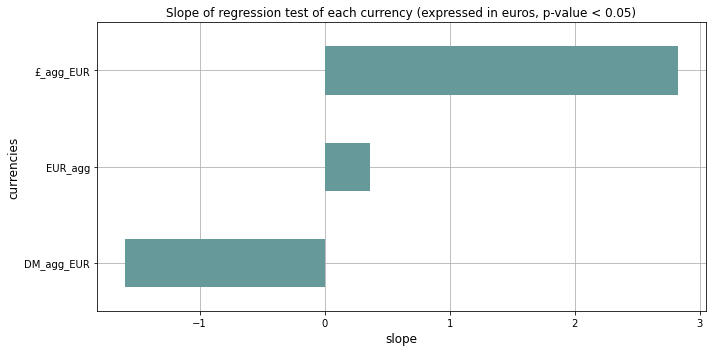

In [64]:
visualize.plot_bars(results_regression_currencies_df.loc[results_regression_currencies_df["pvalue"] < 0.05][["slope"]].head(20).T, title ="Slope of regression test of each currency (expressed in euros, p-value < 0.05)", xlabel ="slope", ylabel = "currencies", figure_name = "bar_slop_currencies", figsize=(10,5))

# Compare e-book and print prices

In [65]:
df["medium_first"].replace({"O": "E-Book", "A": "Printed"}, inplace=True)

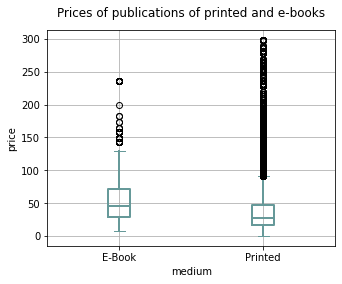

In [66]:
visualize.plot_boxplots_by(df.loc[df["medium_first"].isin(["E-Book","Printed"]) & (df["EUR_agg_agg"]< 300 )],
column_to_plot = "EUR_agg_agg", column_by = "medium_first", figsize = (5,4), xlabel = "medium", ylabel = "price",
title = "Prices of publications of printed and e-books", figure_name = "figure_17_boxplot_prices_print_ebooks")

In [67]:
df.loc[df["medium_first"].isin(["E-Book"]) & (df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].dropna().median()

46.322

In [68]:
df.loc[df["medium_first"].isin(["Printed"]) & (df["EUR_agg_agg"]< 500 )]["EUR_agg_agg"].dropna().median()

28.0

In [69]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].dropna(),
                    equal_var = False
                            )

In [70]:
pvalue

1.1697491149908952e-16

In [71]:
df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].dropna().shape[0]


202988

In [72]:
(df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].dropna().shape[0] / df.loc[df["medium_first"].isin(["Printed"])].shape[0]) * 100

22.29121070392777

In [73]:
(df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna().shape[0] / df.loc[df["medium_first"].isin(["E-Book"])].shape[0]) * 100


0.7216367254067536

In [74]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue



3.5291352084624078e-09

In [75]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue


2.0710945140452372e-13

In [76]:
statistic, pvalue = stats.ttest_ind(
                            df.loc[df["medium_first"].isin(["E-Book"])]["EUR_agg_agg"].dropna(),
                            df.loc[df["medium_first"].isin(["Printed"])]["EUR_agg_agg"].sample(345).dropna(),
                    equal_var = False
                            )
pvalue

4.815373594735866e-08